In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import keras
from keras import Sequential
from keras.layers import Dense 
from keras.regularizers import L1,L2,L1L2
from keras.optimizers import SGD


from mlxtend.plotting import plot_decision_regions

In [2]:
df = pd.read_csv(r"C:\Users\Utteja\Downloads\Data science innomatics\DEEP_LEARNING\Deep_ learning assenment\Multiple CSV\4.linearsep.csv", header = None)

In [3]:
df.head()

,0,1,2
0,-0.177497,0.930496,1.0
1,1.977424,1.766155,0.0
2,1.800024,1.700343,0.0
3,-0.770837,2.359163,1.0
4,-0.308009,1.594063,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       100 non-null    float64
 1   1       100 non-null    float64
 2   2       100 non-null    float64
dtypes: float64(3)
memory usage: 2.5 KB


In [5]:
x = df.iloc[:,0:2]
y = df.iloc[:,2].astype(int)

<AxesSubplot:xlabel='0', ylabel='1'>

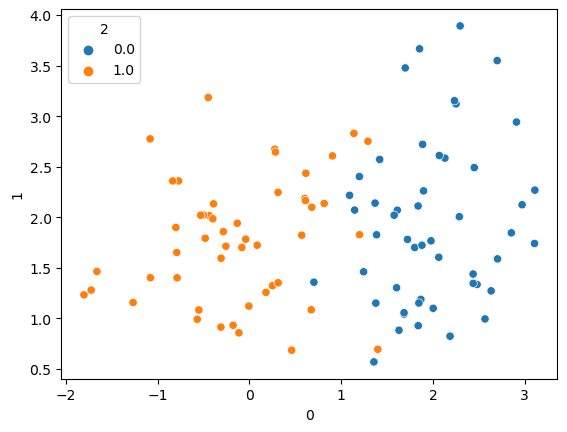

In [6]:
sns.scatterplot(data = df, x=0,y=1, hue = 2)

In [7]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.1, random_state = 0)

In [8]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(90, 2) (10, 2) (90,) (10,)


In [9]:
std = StandardScaler()
x_trainp = std.fit_transform(x_train)
x_testp = std.transform(x_test)

In [10]:
model=Sequential()
model.add(Dense(16,activation="tanh",kernel_regularizer=L2(0.01),bias_regularizer=L2(0.01),input_dim=2))
model.add(Dense(10,activation="tanh",kernel_regularizer=L2(0.01),bias_regularizer=L2(0.01)))
model.add(Dense(8,activation="tanh",kernel_regularizer=L2(0.01),bias_regularizer=L2(0.01)))
model.add(Dense(4,activation="tanh",kernel_regularizer=L2(0.01),bias_regularizer=L2(0.01)))
model.add(Dense(1,activation="sigmoid",kernel_regularizer=L2(0.01),bias_regularizer=L2(0.01)))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                48        
                                                                 
 dense_1 (Dense)             (None, 10)                170       
                                                                 
 dense_2 (Dense)             (None, 8)                 88        
                                                                 
 dense_3 (Dense)             (None, 4)                 36        
                                                                 
 dense_4 (Dense)             (None, 1)                 5         
                                                                 
Total params: 347
Trainable params: 347
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(loss="binary_crossentropy",optimizer=SGD(learning_rate=0.1),metrics=["accuracy"])

history=model.fit(x_trainp,y_train,batch_size=5,epochs=20,validation_split=0.1)

Epoch 1/20
17/17 [==============================] - 2s 29ms/step - loss: 0.7466 - accuracy: 0.9506 - val_loss: 0.7797 - val_accuracy: 0.7778
Epoch 2/20
17/17 [==============================] - 0s 5ms/step - loss: 0.5463 - accuracy: 0.9630 - val_loss: 0.7731 - val_accuracy: 0.7778
Epoch 3/20
17/17 [==============================] - 0s 5ms/step - loss: 0.4773 - accuracy: 0.9753 - val_loss: 0.7888 - val_accuracy: 0.7778
Epoch 4/20
17/17 [==============================] - 0s 5ms/step - loss: 0.4484 - accuracy: 0.9506 - val_loss: 0.8065 - val_accuracy: 0.7778
Epoch 5/20
17/17 [==============================] - 0s 5ms/step - loss: 0.4217 - accuracy: 0.9753 - val_loss: 0.8123 - val_accuracy: 0.7778
Epoch 6/20
17/17 [==============================] - 0s 5ms/step - loss: 0.4071 - accuracy: 0.9630 - val_loss: 0.8227 - val_accuracy: 0.7778
Epoch 7/20
17/17 [==============================] - 0s 5ms/step - loss: 0.3822 - accuracy: 0.9753 - val_loss: 0.8687 - val_accuracy: 0.7778
Epoch 8/20
17/17 [=

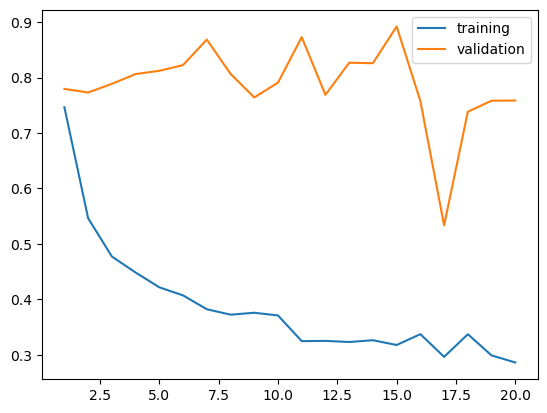

In [13]:
plt.plot(range(1,21),history.history["loss"],label="training")
plt.plot(range(1,21),history.history["val_loss"],label="validation")
plt.legend()

9600/9600 [==============================] - 15s 2ms/step


<AxesSubplot:>

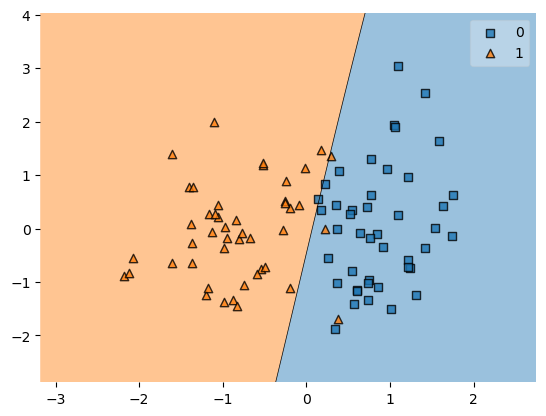

In [14]:
plot_decision_regions(x_trainp,y_train.values,clf=model)